In [12]:
import time 
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

In [13]:
n_samples = 1500
random_state = 100

noisy_circles = datasets.make_circles(n_samples=n_samples, factor =0.5, noise = 0.05)

X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

varied = datasets.make_blobs(n_samples = n_samples, cluster_std = [1.0, 2.5, 0.5], random_state=random_state)

In [16]:
aaa = cycle('aaaa')

In [19]:
aaa

In [35]:
np.array(list((islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
     '#f781bf', '#a65628', '#984ea3',
     '#999999', '#e41a1c', '#dede00']), 3))))

array(['#377eb8', '#ff7f00', '#4daf4a'], dtype='<U7')

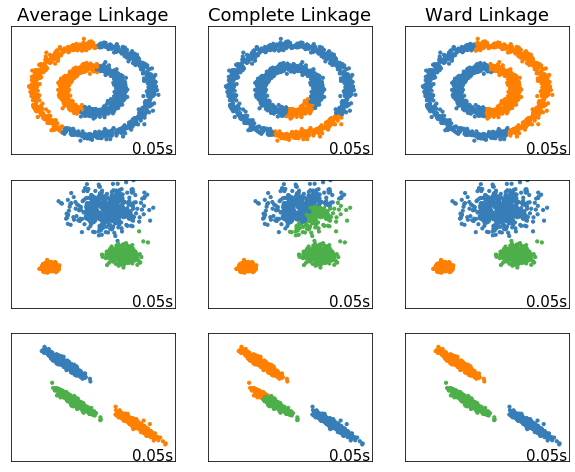

In [21]:
plt.figure(figsize = (10,8))
plot_num = 1
default_base = {'n_neighbors': 10, 'n_clusters':3}
datasets = [(noisy_circles, {'n_clusters': 2}), (varied, {'n_neighbors':2}), (aniso, {'n_neighbors':2})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    params = default_base.copy()
    params.update(algo_params)
    X, y = dataset
    X = StandardScaler().fit_transform(X)
    
    ward = cluster.AgglomerativeClustering(n_clusters=params['n_clusters'], linkage = 'ward')
    complete = cluster.AgglomerativeClustering(n_clusters= params['n_clusters'], linkage = 'complete')
    average = cluster.AgglomerativeClustering(n_clusters = params['n_clusters'], linkage = 'average')
    
    clustering_algorithms =(
        ('Average Linkage', average),
        ('Complete Linkage', complete),
        ('Ward Linkage', ward))
    
    for name, algorithm in clustering_algorithms:
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)
            
        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset ==0:
            plt.title(name, size = 18)
        
        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']), int(max(y_pred)+1))))
        plt.scatter(X[:,0], X[:,1], s=10, color = colors[y_pred])
        
        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs'%(t1-t0)), transform = plt.gca().transAxes, size = 15, horizontalalignment = 'right')
        plot_num +=1
plt.show()

In [32]:
max(y_pred)+1


3